In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # Importing tqdm for progress reporting
from PIL import Image 

In [2]:
# Constants
c = 3e8  # Speed of light (m/s)
freq = 200e9  # Frequency (Hz)
wavelength = c / freq  # Wavelength (meters)
k = 2 * np.pi / wavelength  # Wavenumber
distance = 0.5          # (in meters)

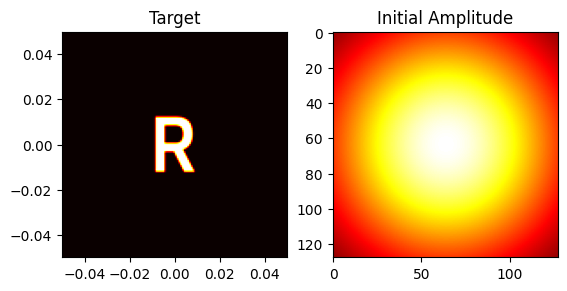

In [21]:
#################################################    waveplate     #####################################
waveplate_size_x = 0.1  # (in meters)
waveplate_grid_x= 128

waveplate_size_y = 0.1  # (in meters)
waveplate_grid_y= 128

x_values_wp = np.linspace(-waveplate_size_x / 2, waveplate_size_x / 2, waveplate_grid_x)
y_values_wp = np.linspace(-waveplate_size_y / 2, waveplate_size_y / 2, waveplate_grid_y)
waveplate = np.array([[(x, y) for x in x_values_wp] for y in y_values_wp])
#################################################    waveplate     #####################################


#################################################    image plane     #####################################
image_size_x=0.1        # (in meters)
image_grig_x=128

image_size_y=0.1       # (in meters)
image_grig_y=128

x_values = np.linspace(-image_size_x / 2, image_size_x / 2, image_grig_x)
y_values = np.linspace(-image_size_y / 2, image_size_y / 2, image_grig_y)
image = np.array([[(x, y) for x in x_values] for y in y_values])
#################################################    image plane     #####################################

#################################################    TARGET   cross  #####################################
# vertical_size_x = 0.01  # Width of the vertical part of the cross (meters)
# horizontal_size_y = 0.01  # Width of the horizontal part of the cross (meters)

# vertical_size_y = 0.09  # Height of the vertical part of the cross (meters)
# horizontal_size_x = 0.09  # Length of the horizontal part of the cross (meters)

# target_amp = np.zeros((image_grig_x, image_grig_y))

# # Calculate indices for the center of the grid
# x_center_idx = np.abs(x_values).argmin()  # Closest to x = 0
# y_center_idx = np.abs(y_values).argmin()  # Closest to y = 0

# # Determine half-widths in terms of grid points for vertical and horizontal parts
# dx_vertical = int((vertical_size_x / image_size_x) * image_grig_x / 2)
# dy_vertical = int((vertical_size_y / image_size_y) * image_grig_y / 2)

# dx_horizontal = int((horizontal_size_x / image_size_x) * image_grig_x / 2)
# dy_horizontal = int((horizontal_size_y / image_size_y) * image_grig_y / 2)

# # Set values in the vertical part of the cross to 1
# target_amp[y_center_idx - dy_vertical:y_center_idx + dy_vertical + 1, x_center_idx - dx_vertical:x_center_idx + dx_vertical + 1] = 1

# # Set values in the horizontal part of the cross to 1
# target_amp[y_center_idx - dy_horizontal:y_center_idx + dy_horizontal + 1, x_center_idx - dx_horizontal:x_center_idx + dx_horizontal + 1] = 1

# plt.subplot(1, 2, 1)
# plt.title('Target')
# plt.imshow(target_amp,extent=[x_values[0], x_values[-1], y_values[0], y_values[-1]], cmap='hot')
# plt.colorbar(label="Intensity")

#################################################    TARGET   cross  #####################################

# # #################################################    TARGET vertical line    #####################################

# target_size_x = 0.015  #  (meters)
# target_size_y = 0.015  #  (meters)

# target_amp = np.zeros((image_grig_x,image_grig_y))
# # Calculate indices for the center square
# x_center_idx = np.abs(x_values).argmin()  # Closest to x = 0
# y_center_idx = np.abs(y_values).argmin()  # Closest to y = 0

# # Determine half-widths in terms of grid points
# dx = int((target_size_x / image_size_x) * image_grig_x / 2)
# dy = int((target_size_y / image_size_y) * image_grig_y / 2)

# print(x_center_idx - dx,':',x_center_idx + dx + 1,y_center_idx - dy,':',y_center_idx + dy + 1)

# # Set values in the center square to 1
# target_amp[x_center_idx - dy:x_center_idx + dy + 1,y_center_idx - dx:y_center_idx + dx + 1] = 1
# plt.subplot(1, 2, 1)
# plt.title('Target')
# plt.imshow(target_amp,extent=[x_values[0], x_values[-1], y_values[0], y_values[-1]], cmap='hot')
# # #################################################    TARGET  vertical line   #####################################

#################################################    TARGET   Y  #####################################
# # Initialize target amplitude
# X, Y = np.meshgrid(x_values, y_values)
# target_amp = np.zeros((image_grig_y, image_grig_x))

# # Parameters for the "Y"
# arm_length = 0.03  # Length of the diagonal arms
# stem_length = 0.035  # Length of the vertical stem
# stem_width = 0.02  # Width of the vertical stem
# arm_width = 0.01  # Width of the diagonal arms

# # Add diagonal arms of "Y"
# for i in range(image_grig_y):
#     for j in range(image_grig_x):
#         # Top left arm (slope -1)
#         if Y[i, j] > 0 and abs(Y[i, j] - X[i, j]) < arm_width and Y[i, j] < arm_length:
#             target_amp[i, j] = 1
#         # Top right arm (slope +1)
#         if Y[i, j] > 0 and abs(Y[i, j] + X[i, j]) < arm_width and Y[i, j] < arm_length:
#             target_amp[i, j] = 1

# # Add vertical stem of "Y"
# for i in range(image_grig_y):
#     for j in range(image_grig_x):
#         if Y[i, j] < 0 and abs(X[i, j]) < stem_width / 2 and Y[i, j] > -stem_length:
#             target_amp[i, j] = 1

# # # Set values in the center square to 1
# plt.subplot(1, 2, 1)
# plt.title('Target')
# plt.imshow(target_amp,extent=[x_values[0], x_values[-1], y_values[0], y_values[-1]], cmap='hot')
#################################################    TARGET   Y #####################################

#################################################    TARGET   R  #####################################
# Load your image and preprocess it
image_path = "image/target_image_2.jpg"  # Replace with the path to your image
target_img = Image.open(image_path).convert("L")  # Convert to grayscale
target_img = target_img.resize((image_grig_x, image_grig_y))  # Resize to simulation grid size
target_amp = np.array(target_img) / 255.0  # Normalize to range [0, 1]
target_amp = 1 - (np.array(target_img) / 255.0)

plt.subplot(1, 2, 1)
plt.title('Target')
plt.imshow(target_amp,extent=[x_values[0], x_values[-1], y_values[0], y_values[-1]], cmap='hot')
#################################################    TARGET   R  #####################################


#################################################    BEAM     #####################################
w0 = 0.08  # Beam waist (meters)
X, Y = np.meshgrid(x_values_wp, y_values_wp)
initial_amp = np.exp(-2 * (X**2 + Y**2) / w0**2)
initial_phase = np.zeros_like(initial_amp)  # make a flat phase
E_in = initial_amp * np.exp(1j * initial_phase)
plt.subplot(1, 2, 2)
plt.title('Initial Amplitude')
plt.imshow(np.abs(E_in),vmin=0, cmap='hot')
plt.show()
#################################################    BEAM     #####################################

In [8]:
# Define a function for Omega (phase or angular modulation)
def calculate_omega(rr):
    
    
    z=distance
    cos_omega = z / rr
    
    # Calculate omega (angle in radians)
    omega = np.arccos(cos_omega)

    return omega

# Huygens-Fresnel propagation with interference
def propagate_with_interference(E_input,shape_input,shape_output):

    E_out = np.zeros((shape_output.shape[0],shape_output.shape[1]), dtype=complex)
    
    for ix in tqdm(range(E_input.shape[0]), desc="Propagating wavefront"):
        for iy in range(E_input.shape[0]):
            r = np.sqrt((shape_input[ix,iy,0] - shape_output[:, :,0])**2 + (shape_input[ix,iy,1] - shape_output[:, :,1])**2 + distance**2)
            omega = calculate_omega(r)
            # plt.imshow(1+np.cos(omega))
            # plt.colorbar()
            # plt.show()
         
        
            
            E_d=((np.abs(E_input[ix, iy]))/r)*(np.exp(((-1*1j)*k*r)+(1j*np.angle(E_input[ix, iy]))))
            # plt.pcolormesh((np.angle(E_d)), cmap='hot')
            # plt.colorbar()
            # plt.show()
            

            E_out += E_d*(1+np.cos(omega))
            # plt.pcolormesh((np.angle(E_d)), cmap='hot')
            # plt.title(str(ix)+'  '+str(iy))
            # plt.colorbar()
            # plt.show()
            
      
    return E_out

Propagating wavefront: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:47<00:00,  3.17it/s]


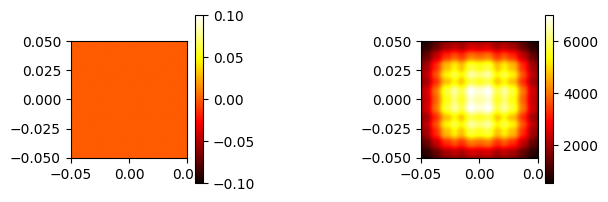

Propagating wavefront: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:44<00:00,  3.35it/s]


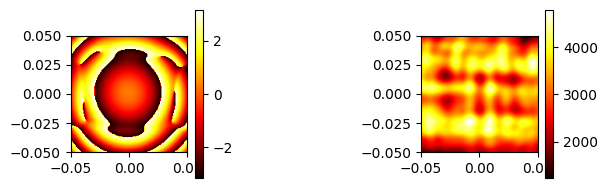

Propagating wavefront: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:42<00:00,  3.51it/s]


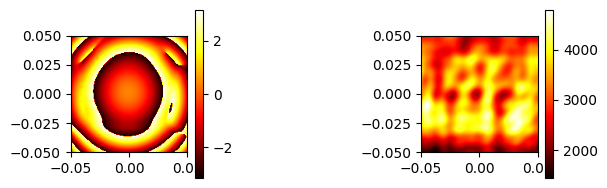

Propagating wavefront: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:42<00:00,  3.56it/s]


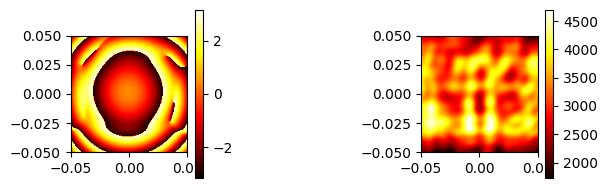

Propagating wavefront: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:42<00:00,  3.57it/s]


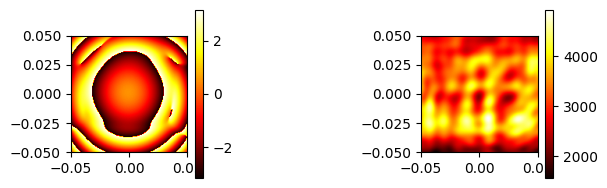

Propagating wavefront: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:41<00:00,  3.58it/s]


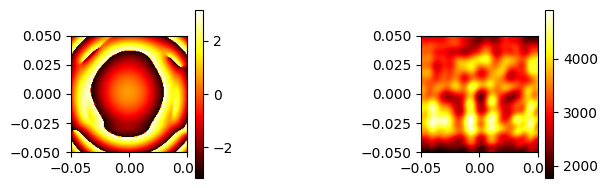

Propagating wavefront: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:43<00:00,  3.42it/s]


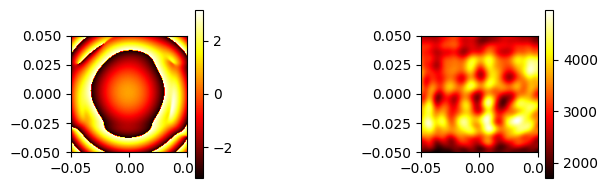

Propagating wavefront: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:43<00:00,  3.46it/s]


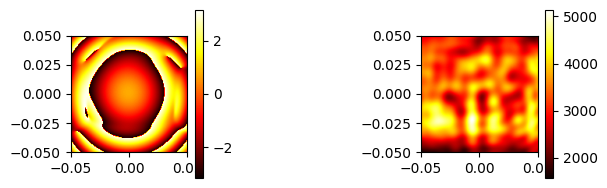

Propagating wavefront: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:42<00:00,  3.52it/s]


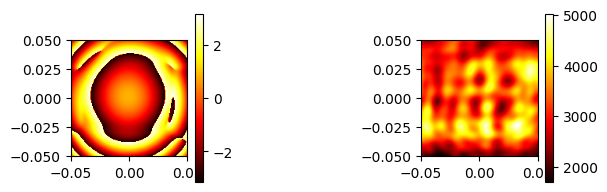

Propagating wavefront: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:43<00:00,  3.46it/s]


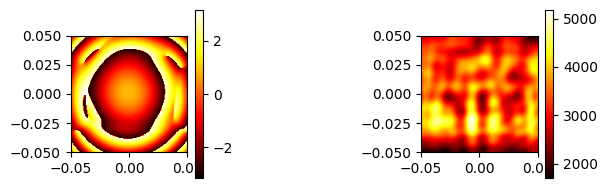

Propagating wavefront: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:41<00:00,  3.60it/s]


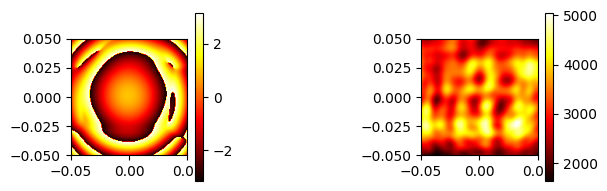

Propagating wavefront: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:44<00:00,  3.40it/s]


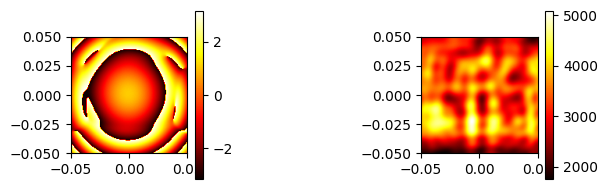

Propagating wavefront: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:42<00:00,  3.50it/s]


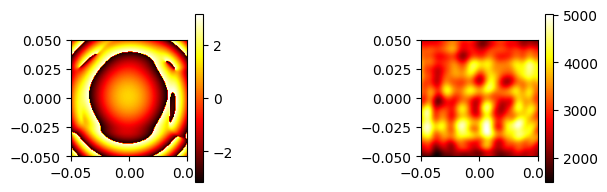

Propagating wavefront: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:44<00:00,  3.40it/s]


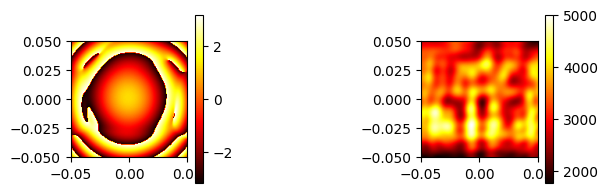

Propagating wavefront: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:43<00:00,  3.45it/s]


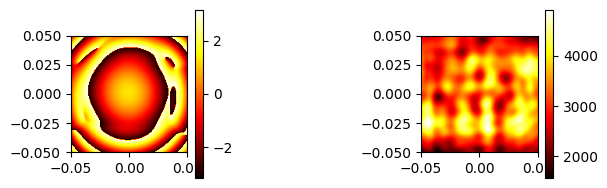

Propagating wavefront: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:42<00:00,  3.51it/s]


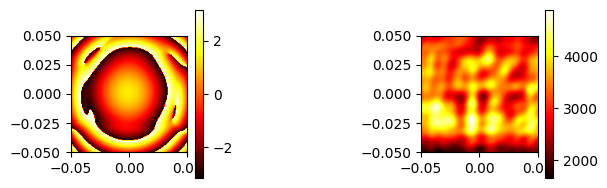

Propagating wavefront: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:42<00:00,  3.52it/s]


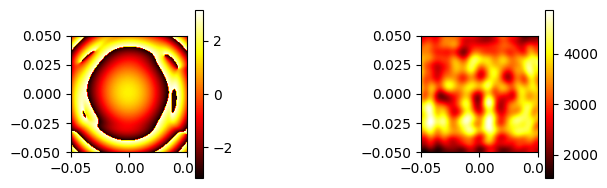

Propagating wavefront: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:46<00:00,  3.24it/s]


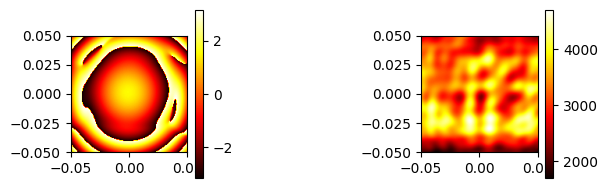

Propagating wavefront: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:42<00:00,  3.54it/s]


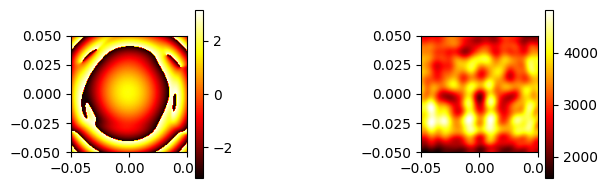

Propagating wavefront: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:42<00:00,  3.55it/s]


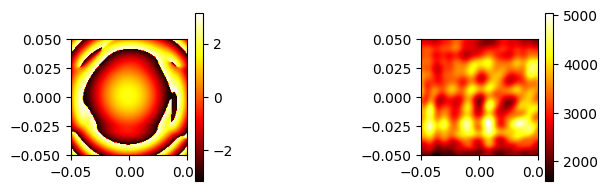

Propagating wavefront: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:42<00:00,  3.57it/s]


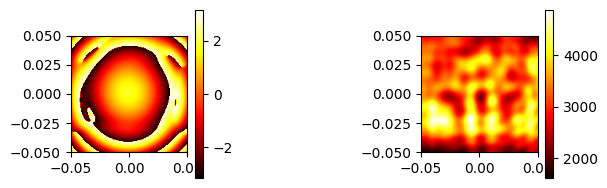

Propagating wavefront: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:48<00:00,  3.08it/s]


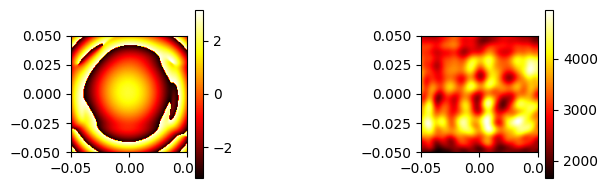

Propagating wavefront: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:44<00:00,  3.34it/s]


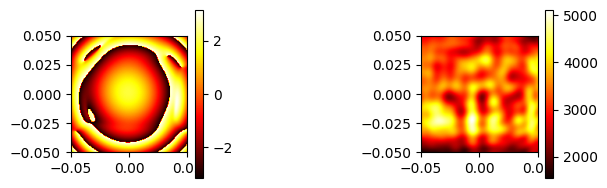

Propagating wavefront:  55%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                               | 82/150 [00:23<00:19,  3.44it/s]


KeyboardInterrupt: 

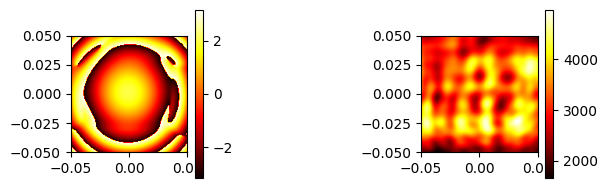

In [5]:
# Gerchberg-Saxton iteration with interference
def gerchberg_saxton_with_interference(E_in, target_amp, iterations):
    # Start with the field at the waveplate with an initial phase of zero
    
    E_at_plate=E_in
    
  
    # for i in tqdm(range(iterations), desc="Gerchberg-Saxton Iterations"):
    for i in range(iterations):
        # Step 1: Forward propagation to the target plane (image plane)
        
        plt.subplot(2, 3, 1)
        plt.imshow(np.angle(E_at_plate), cmap='hot',extent=[waveplate[0,0,0], waveplate[-1,-1,0], waveplate[0,0,1], waveplate[-1,-1,1]])
        plt.colorbar()
# 
        
        E_at_image = propagate_with_interference(E_at_plate,waveplate,image)
        
        
        plt.subplot(2, 3, 3)
        plt.imshow(np.abs(E_at_image), cmap='hot',extent=[image[0,0,0], image[-1,-1,0], image[0,0,1], image[-1,-1,1]])
        plt.colorbar()



        Phase_at_image=np.angle(E_at_image)
        E_at_image =  target_amp * np.exp(1j * Phase_at_image)
        
        # Step 3: Backward propagation to the phase plate (wave plate)
        E_at_plate = propagate_with_interference(E_at_image,image,waveplate)
        
        
        # plt.subplot(2, 3, 4)
        # plt.pcolormesh(np.abs(E_at_plate), cmap ='hot')
        # plt.colorbar()
        # plt.subplot(2, 3, 3)
        # plt.pcolormesh(np.angle(E_at_plate), cmap ='hot')
        # plt.colorbar()


        
        Phase_at_plate=np.angle(E_at_plate)
        
        

        # Step 4: Update the phase at the wave plate (keep Gaussian amplitude, update phase)

        E_at_plate = initial_amp * np.exp(1j * Phase_at_plate)
                
        
        plt.show()
    
    # Return the final phase of the waveplate
    return Phase_at_plate


# Run the Gerchberg-Saxton algorithm with interference
final_phase_with_interference = gerchberg_saxton_with_interference(E_in, target_amp, iterations=100)

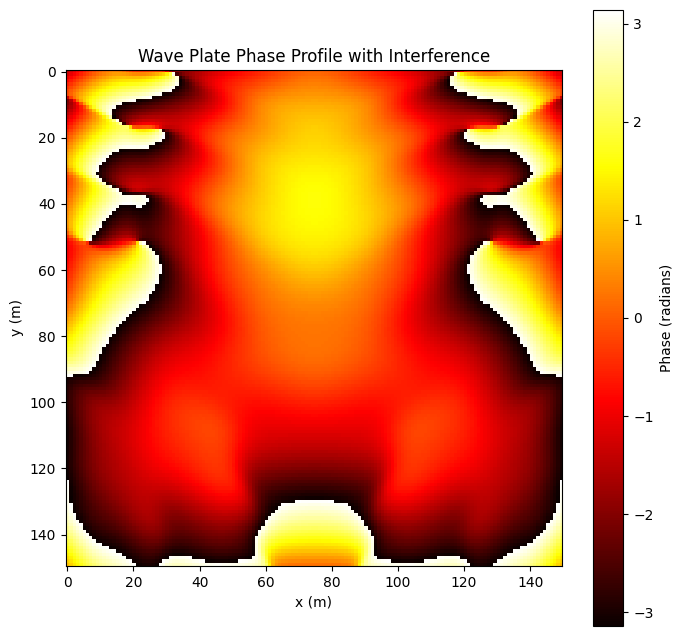

In [25]:
# Visualize the updated phase profile
plt.figure(figsize=(8, 8))
plt.imshow(final_phase_with_interference, cmap='hot')
plt.colorbar(label='Phase (radians)')
plt.title('Wave Plate Phase Profile with Interference')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

# To Save or Load the FILE

In [16]:
# final_phase_with_interference = np.load('final_phase_plate_horizontal_line.npy')
final_phase_with_interference = np.load('final_phase_plate_Y.npy')
# to save the phase plate
# np.save('final_phase_plate_cross.npy', final_phase_with_interference)
# np.save('final_phase_plate_Y.npy', final_phase_with_interference)

In [19]:
projection_plate = initial_amp * np.exp(1j * final_phase_with_interference)

projection_result = propagate_with_interference(projection_plate, waveplate, image)

Propagating wavefront: 100%|███████████████████████████████████████████████████████| 150/150 [00:44<00:00,  3.40it/s]


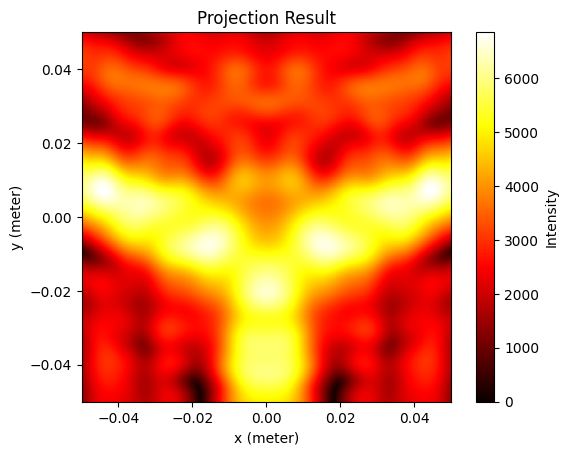

In [20]:
plt.imshow(np.abs(projection_result), cmap='hot', vmin=0 , extent=[image[0, 0, 0], image[-1, -1, 0], image[0, 0, 1], image[-1, -1, 1]])
plt.colorbar(label='Intensity')  # Optional: Label for the colorbar
plt.xlabel('x (meter)')
plt.ylabel('y (meter)')
plt.title('Projection Result')
plt.show()

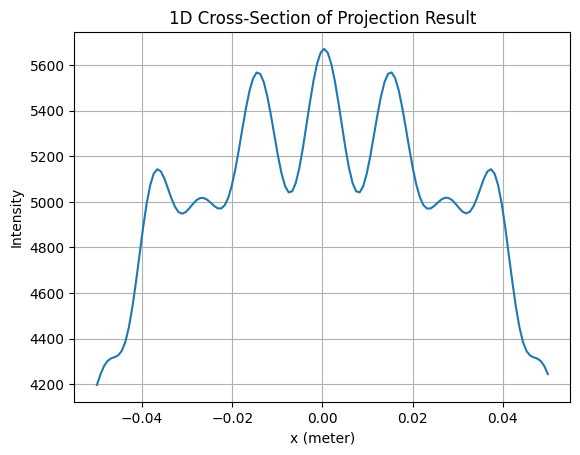

In [14]:
# Choose a specific row (y-axis) or column (x-axis) to plot
row_index = projection_result.shape[0] // 2  # Middle row
x_coords = np.linspace(image[0, 0, 0], image[-1, -1, 0], projection_result.shape[1])
y_values = np.abs(projection_result[row_index, :])  # Values along the chosen row

# Plot the selected cross-section
plt.plot(x_coords, y_values)
plt.xlabel('x (meter)')
plt.ylabel('Intensity')
plt.title('1D Cross-Section of Projection Result')
plt.grid()
plt.show()


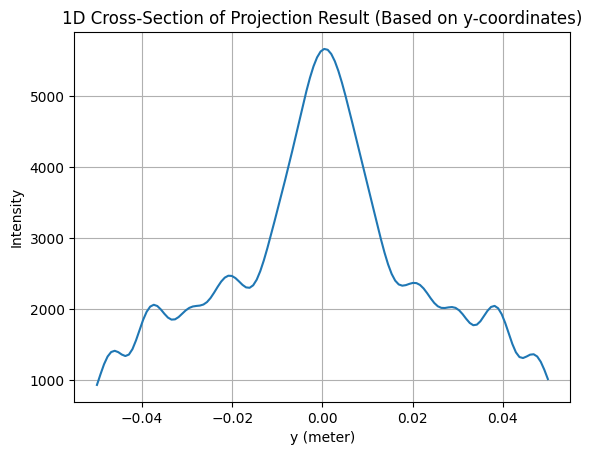

In [15]:
# Choose a specific column (x-axis) to plot
col_index = projection_result.shape[1] // 2  # Middle column
y_coords = np.linspace(image[0, 0, 1], image[-1, -1, 1], projection_result.shape[0])
x_values = np.abs(projection_result[:, col_index])  # Values along the chosen column

# Plot the selected cross-section
plt.plot(y_coords, x_values)
plt.xlabel('y (meter)')
plt.ylabel('Intensity')
plt.title('1D Cross-Section of Projection Result (Based on y-coordinates)')
plt.grid()
plt.show()


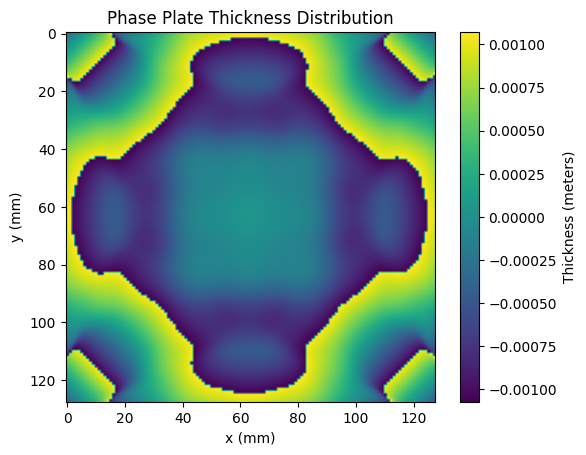

In [17]:
c = 3e8  # Speed of light in m/s
frequency = 200e9  # Frequency in Hz
wavelength = c / frequency

n = 1.7  # Refractive index of polyamide

# Calculate thickness distribution based on the final phase profile
thickness = (final_phase_with_interference * wavelength) / (2 * np.pi * (n - 1))

# Plot the thickness distribution
plt.imshow(thickness)
plt.title("Phase Plate Thickness Distribution")
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.colorbar(label="Thickness (meters)")
plt.show()